## Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.


In [1]:
# lOADING THE LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from ml_metrics import mse
print("Libraries Imported!")

Libraries Imported!


In [2]:
# loading csv data into dataframe and viewing
df=pd.read_csv("H:/ExcelR Data Science/datasets_BA/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# Checking for null data and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
# Renaming columns
df.rename(columns={'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'},inplace=True)
df.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Checking the distribution and presence of outliers using histogram and boxplot


## 1. Histograms

H:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

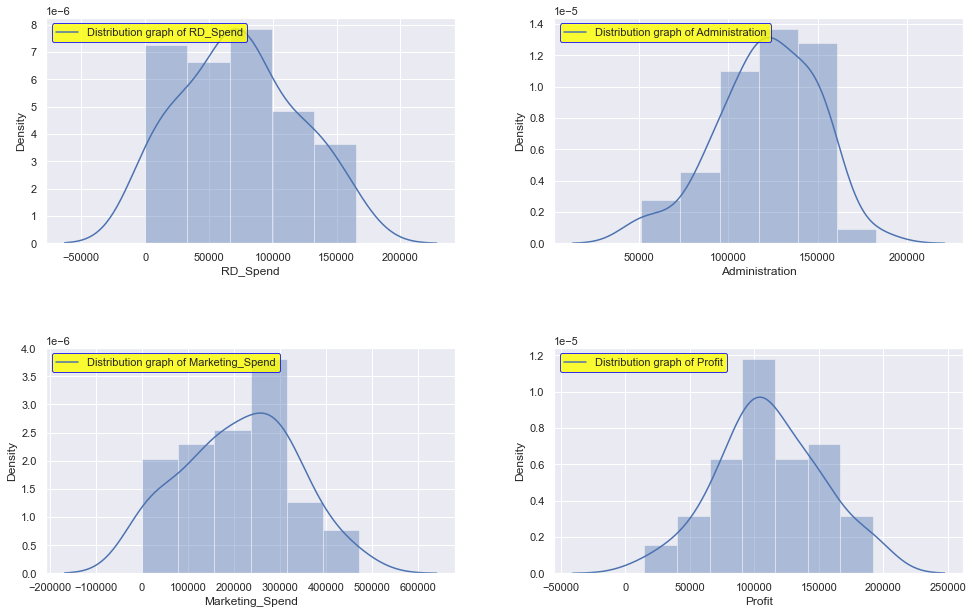

In [5]:
# Visualizing the distribution using histogram
sns.set(rc={"figure.figsize": (15,10)})
#creating first plot 
plt.subplot(2,2,1)
ax = sns.distplot(df['RD_Spend'])
plt.legend(["Distribution graph of RD_Spend"],loc='upper left',facecolor='yellow',edgecolor='blue')

# Creating the second plot
plt.subplot(2,2,2)
ax = sns.distplot(df['Administration'])
plt.legend(["Distribution graph of Administration"],loc='upper left',facecolor='yellow',edgecolor='blue')

#Creating third plot
plt.subplot(2,2,3)
ax = sns.distplot(df['Marketing_Spend'])
plt.legend(["Distribution graph of Marketing_Spend"],loc='upper left',facecolor='yellow',edgecolor='blue')

#Creating fourth plot
plt.subplot(2,2,4)
ax = sns.distplot(df['Profit'])
plt.legend(["Distribution graph of Profit"],loc='upper left',facecolor='yellow',edgecolor='blue')


plt.tight_layout(5) 
plt.show()

## 2. Boxplots

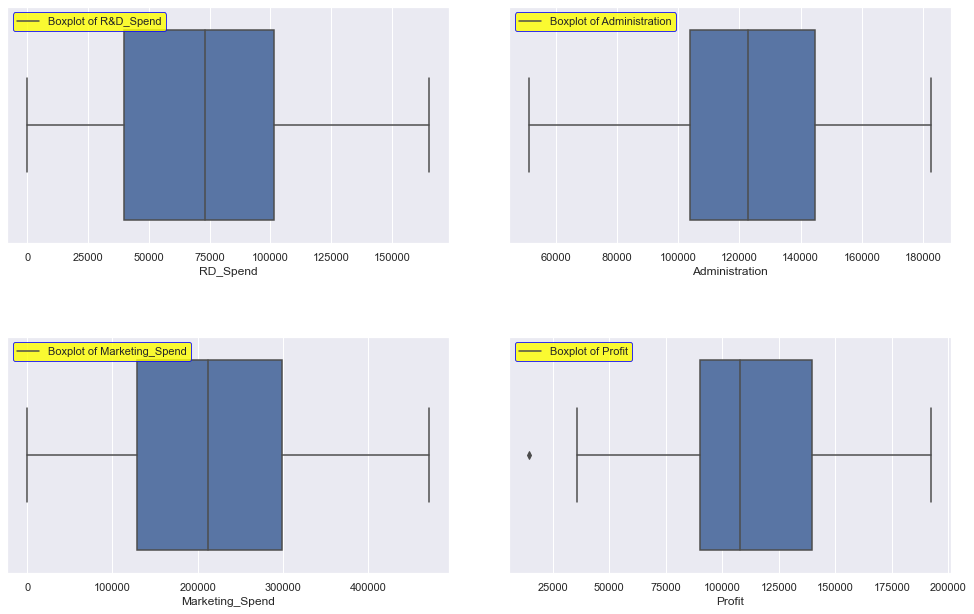

In [6]:
# Using boxplots to detect outliers
sns.set(rc={"figure.figsize": (15,10)})
#creating first plot 
plt.subplot(2,2,1)
ax = sns.boxplot(x=df['RD_Spend'])
plt.legend(['Boxplot of R&D_Spend'],loc='upper left',facecolor='yellow',edgecolor='blue')

# Creating second plot
plt.subplot(2,2,2)
ax = sns.boxplot(x=df['Administration'])
plt.legend(["Boxplot of Administration"],loc='upper left',facecolor='yellow',edgecolor='blue')

# Creating third plot
plt.subplot(2,2,3)
ax = sns.boxplot(x=df['Marketing_Spend'])
plt.legend(["Boxplot of Marketing_Spend"],loc='upper left',facecolor='yellow',edgecolor='blue')

# Creating fourth plot
plt.subplot(2,2,4)
ax = sns.boxplot(x=df['Profit'])
plt.legend(["Boxplot of Profit"],loc='upper left',facecolor='yellow',edgecolor='blue')

plt.tight_layout(5) 
plt.show()

 ###  Profit column has an outlier

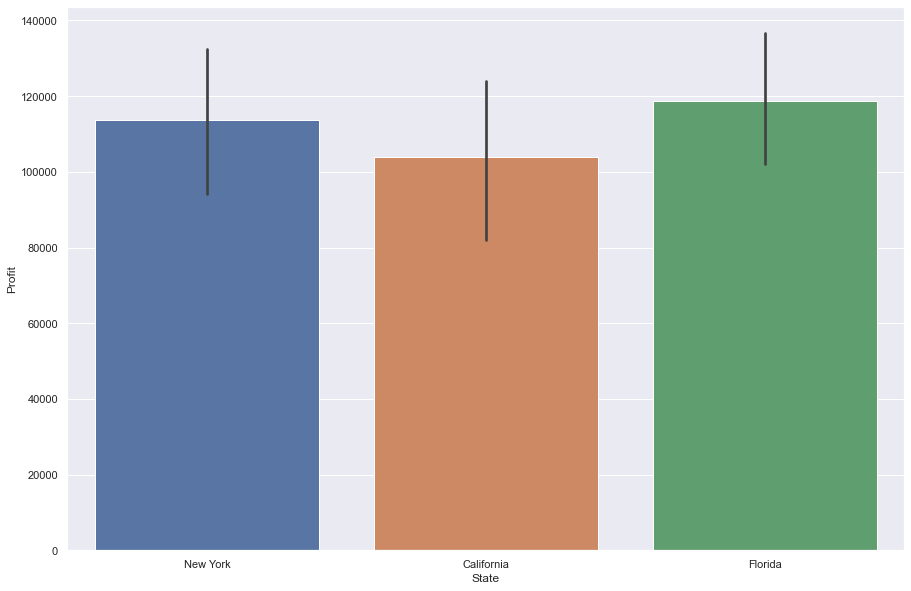

In [7]:
# Checking relationship of State variable with Y
sns.barplot(x='State',y='Profit',data=df)
plt.show()

All three states category seems to have more or less same profit levels so state variable cannot be a good predictor for profit.So we will drop it.

In [8]:
#Creating new dataframe by dropping State variable
df1=df[['RD_Spend','Administration','Marketing_Spend','Profit']]
df1.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [9]:
# Checking the basic statistics of dataset
df1.describe()

,RD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Checking correlation using correlation matrix and pairplot

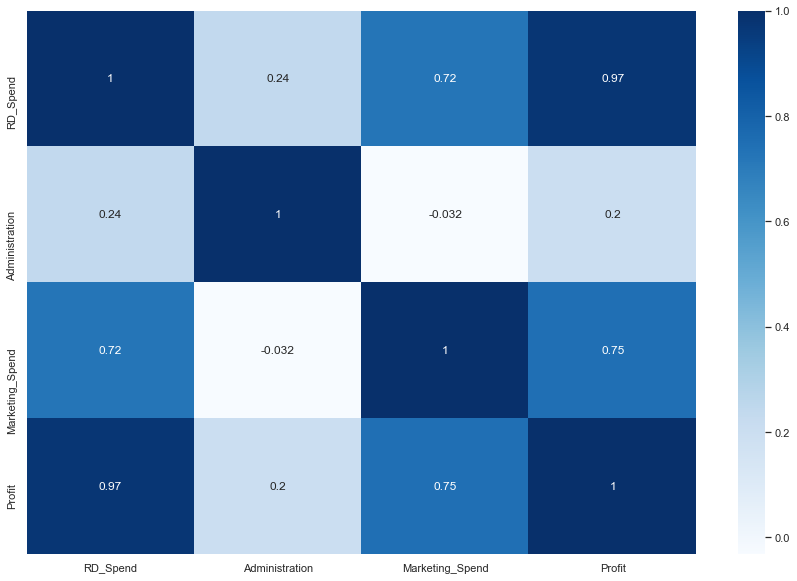

In [10]:
ax = sns.heatmap(df1.corr(),annot=True,cmap='Blues') 

    Output variable(Profit) has a high correlation(0.97) with R&D and medium correlation(0.75) with Marketing_Spend and very low correlation(0.2) with Administration.

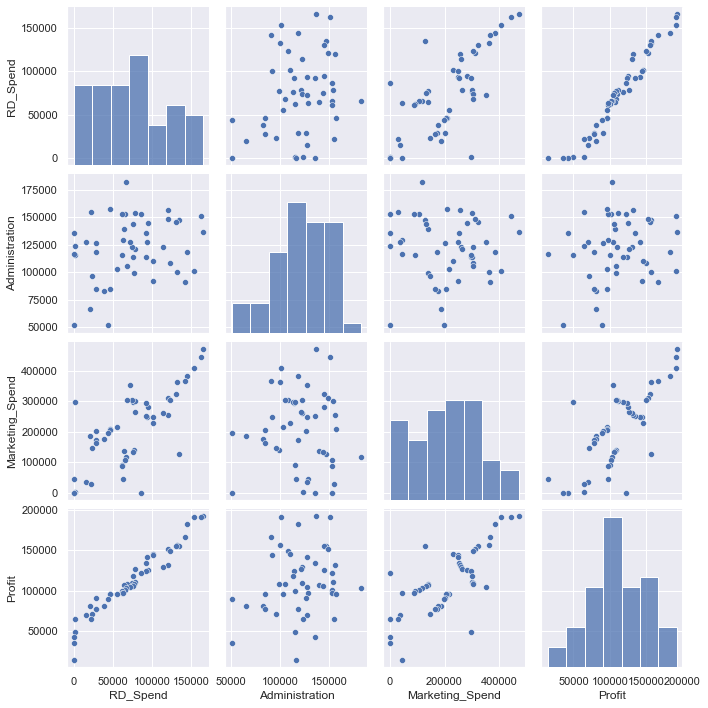

In [11]:
# Creating pairplot
sns.pairplot(df[['RD_Spend','Administration','Marketing_Spend','Profit']])

# Standardization 

In [12]:
array_df1=df1.values
standard_df1=StandardScaler().fit(array_df1).transform(array_df1)
standard_df1[0:5]

array([[ 2.01641149,  0.56075291,  2.15394309,  2.01120333],
       [ 1.95586034,  1.08280658,  1.9236004 ,  1.99942997],
       [ 1.75436374, -0.72825703,  1.62652767,  1.98084225],
       [ 1.55478369, -0.09636463,  1.42221024,  1.77662724],
       [ 1.5049372 , -1.07991935,  1.28152771,  1.35774012]])

In [13]:
# creating dataframe of standardized values
df2=pd.DataFrame({'rd_spend':standard_df1[:,0],'administration':standard_df1[:,1],'marketing_spend':standard_df1[:,2],'profit':standard_df1[:,3]})
df2.head()

,rd_spend,administration,marketing_spend,profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


# Variable/feature selection


We will first create one model for each predictor variable and then go on adding variables.

In [14]:
model1 = smf.ols('profit~rd_spend',data=df2).fit()
print('p-value:',model1.pvalues)
print("R-squared value",model1.rsquared)
print("Adjusted R-squared value:",model1.rsquared_adj)

p-value: Intercept    1.000000e+00
rd_spend     3.500322e-32
dtype: float64
R-squared value 0.9465353160804392
Adjusted R-squared value: 0.9454214684987816


Here p-value of rd_spend is less than 0.05 so it is significant

In [15]:
model2 = smf.ols('profit~administration',data=df2).fit()
print('p-value:',model2.pvalues)
print("R-squared value",model2.rsquared)
print("Adjusted R-squared value:",model2.rsquared_adj)

p-value: Intercept         1.000000
administration    0.162217
dtype: float64
R-squared value 0.04028714077757234
Adjusted R-squared value: 0.020293122877105163


Here p-value of administration is more than 0.05 so it is insignificant

In [16]:
model3 = smf.ols('profit~marketing_spend',data=df2).fit()
print('p-value:',model3.pvalues)
print("R-squared value",model3.rsquared)
print("Adjusted R-squared value:",model3.rsquared_adj)

p-value: Intercept          1.000000e+00
marketing_spend    4.381073e-10
dtype: float64
R-squared value 0.5591535746115515
Adjusted R-squared value: 0.5499692740826254


Here p-value of marketing spend is less than 0.05 so it is significant

The model with highest R2 is with rd_spend variable.Now we will add other variables to it one by one and see the change in R2.

In [17]:
model4 = smf.ols('profit~rd_spend+administration',data=df2).fit()
print('p-value:',model4.pvalues)
print("R-squared value",model4.rsquared)
print("Adjusted R-squared value:",model4.rsquared_adj)

p-value: Intercept         1.000000e+00
rd_spend          2.278348e-31
administration    2.888932e-01
dtype: float64
R-squared value 0.9478129385009173
Adjusted R-squared value: 0.9455922124796797


In [18]:
model5 = smf.ols('profit~rd_spend+marketing_spend',data=df2).fit()
print('p-value:',model5.pvalues)
print("R-squared value",model5.rsquared)
print("Adjusted R-squared value:",model5.rsquared_adj)

p-value: Intercept          1.000000e+00
rd_spend           6.040433e-24
marketing_spend    6.003040e-02
dtype: float64
R-squared value 0.9504503015559763
Adjusted R-squared value: 0.9483418037498477


In [19]:
model6= smf.ols('profit~marketing_spend+administration',data=df2).fit()
print('p-value:',model6.pvalues)
print("R-squared value",model6.rsquared)
print("Adjusted R-squared value:",model6.rsquared_adj)

p-value: Intercept          1.000000e+00
marketing_spend    9.727245e-11
administration     1.729198e-02
dtype: float64
R-squared value 0.6097229746770663
Adjusted R-squared value: 0.593115441684601


In [20]:
model7= smf.ols('profit~rd_spend+marketing_spend+administration',data=df2).fit()
print('p-value:',model7.pvalues)
print("R-squared value",model7.rsquared)
print("Adjusted R-squared value:",model7.rsquared_adj)

p-value: Intercept          1.000000e+00
rd_spend           2.634968e-22
marketing_spend    1.047168e-01
administration     6.017551e-01
dtype: float64
R-squared value 0.9507459940683246
Adjusted R-squared value: 0.9475337762901719


# Checking collinearity by calculating VIF scores 

In [21]:
rsq_rd = smf.ols('rd_spend~marketing_spend+administration',data=df2).fit().rsquared  
vif_rd = 1/(1-rsq_rd) 

rsq_mkt = smf.ols('marketing_spend~rd_spend+administration',data=df2).fit().rsquared  
vif_mkt = 1/(1-rsq_mkt) 

rsq_adm = smf.ols('administration~marketing_spend+rd_spend',data=df2).fit().rsquared  
vif_adm = 1/(1-rsq_adm) 

d1 = {'Variables':['rd_spend','administration','marketing_spend'],'VIF':[vif_rd,vif_adm,vif_mkt]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,rd_spend,2.468903
1,administration,1.175091
2,marketing_spend,2.326773


The VIF scores are less than 10 so no collinearity present amongst the input variables 

# Calculating RMSE for all models

In [22]:
pred1=model1.predict()
rmse1=np.sqrt(mse(df2.profit,pred1))
print("RMSE for model 1 is:",rmse1)

RMSE for model 1 is: 0.2312243151564316


In [23]:
pred2=model2.predict()
rmse2=np.sqrt(mse(df2.profit,pred2))
print("RMSE for model 2 is:",rmse2)

RMSE for model 2 is: 0.9796493552401428


In [24]:
pred3=model3.predict()
rmse3=np.sqrt(mse(df2.profit,pred3))
print("RMSE for model 3 is:",rmse3)

RMSE for model 3 is: 0.6639626686707985


In [25]:
pred4=model4.predict()
rmse4=np.sqrt(mse(df2.profit,pred4))
print("RMSE for model 4 is:",rmse4)

RMSE for model 4 is: 0.22844487628109053


In [26]:
pred5=model5.predict()
rmse5=np.sqrt(mse(df2.profit,pred5))
print("RMSE for model 5 is:",rmse5)

RMSE for model 5 is: 0.22259761553984297


In [27]:
pred6=model6.predict()
rmse6=np.sqrt(mse(df2.profit,pred6))
print("RMSE for model 6 is:",rmse6)

RMSE for model 6 is: 0.6247215582344935


In [28]:
pred7=model7.predict()
rmse7=np.sqrt(mse(df2.profit,pred7))
print("RMSE for model 7 is:",rmse7)

RMSE for model 7 is: 0.2219324355106198


RMSE values for model 6 and 8 are almost similar

In [29]:
d={'Models':['rd spend','Administration','marketing spend','rd spend+ administration','rd_spend+marketing_spend','administration+marketing spend','rd_spend+marketing_spend+administration'],
   'R-squared values':[model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared,model6.rsquared,model7.rsquared],
   'RMSE':[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7]}
df_result=pd.DataFrame(d)
df_result

,Models,R-squared values,RMSE
0,rd spend,0.946535,0.231224
1,Administration,0.040287,0.979649
2,marketing spend,0.559154,0.663963
3,rd spend+ administration,0.947813,0.228445
4,rd_spend+marketing_spend,0.950450,0.222598
5,administration+marketing spend,0.609723,0.624722
6,rd_spend+marketing_spend+administration,0.950746,0.221932


Constructing a separate dataframe for P-values of each model

In [39]:
p={'Models':['rd spend','Administration','marketing spend','rd spend+ administration','rd_spend+marketing_spend','administration+marketing spend','rd_spend+marketing_spend+administration'],
   'P values':[model1.pvalues[1].round(2),model2.pvalues[1].round(2),model3.pvalues[1].round(2),[model4.pvalues[1].round(2),model4.pvalues[2].round(2)],[model5.pvalues[1].round(2),model5.pvalues[2].round(2)],[model6.pvalues[1].round(2),model6.pvalues[2].round(2)],
               [model7.pvalues[1].round(2),model7.pvalues[2].round(2),model7.pvalues[3].round(2)]]}
df=pd.DataFrame(p)
df

,Models,P values
0,rd spend,0
1,Administration,0.16
2,marketing spend,0
3,rd spend+ administration,"[0.0, 0.29]"
4,rd_spend+marketing_spend,"[0.0, 0.06]"
5,administration+marketing spend,"[0.0, 0.02]"
6,rd_spend+marketing_spend+administration,"[0.0, 0.1, 0.6]"


In [40]:
# Merging the two dataframes
df_model=pd.merge(df_result,df)
df_model

,Models,R-squared values,RMSE,P values
0,rd spend,0.946535,0.231224,0
1,Administration,0.040287,0.979649,0.16
2,marketing spend,0.559154,0.663963,0
3,rd spend+ administration,0.947813,0.228445,"[0.0, 0.29]"
4,rd_spend+marketing_spend,0.950450,0.222598,"[0.0, 0.06]"
5,administration+marketing spend,0.609723,0.624722,"[0.0, 0.02]"
6,rd_spend+marketing_spend+administration,0.950746,0.221932,"[0.0, 0.1, 0.6]"


#### 4th and 6th model have the highest R-squared values and lowest errors.

#### As adding variables always slightly increases R-squared values , 4th model can be better than 6th one as 6th has all three input variables so may be that is contributing to high R-squared values .

#### Also the P-values for model 4 is less compared to model 6 indicating that the variables in model 4 are more significant than in model 6.So safe bet is model 4.

#### So the best model for predicting profit will be the one having only two predictor variables : rd_spend and marketing_spend.
